## Final Project Submission

Please fill out:
* Student name: Philip Baya Mweri
* Student pace: Part time 
* Scheduled project review date/time: 24/07/2023
* Instructor name: Maryann Mwikali
* Blog post URL:


I Analysed this project based on

1. Genre Trend/Popularity
2. Financial/profits/costs
3. Target Market/Audience/demographics- gender/enthnicty/age/Income class
5. I used the financial data(gross and profit) as the determining factors to measure success

In [55]:
# Your code here - remember to use markdown cells for comments as well!
#Import Libraries
#Read data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [56]:
#loading data into a dataframe and first look at the data
Gross_Movies = pd.read_csv("C:/Users/baya/Documents/flatiron/Phase_1Project/dsc-phase-1-project/zippedData/bom.movie_gross.csv.gz", compression='gzip',header=0,)
Gross_Movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [57]:
#Getting more information about the data
Gross_Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [58]:
#Getting more information about the data- Checking to see if there are duplicates
duplicates = Gross_Movies.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

In [59]:
#Cleaning the data
#removing the foreign gross column as we will not be using it in this analysis
Gross_Movies.drop(columns='foreign_gross')
Gross_Movies1 = Gross_Movies.drop(columns='foreign_gross')
Gross_Movies1

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [60]:
Gross_Movies1.info()
#Drop all the rows with missing values
Gross_Movies2 = Gross_Movies1.dropna()
Gross_Movies2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [61]:
Gross_Movies2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 131.1+ KB


In [62]:
#Getting an overview of the data we are working with
Gross_Movies2.describe()

,domestic_gross,year
count,3.356000e+03,3356.000000
mean,2.877149e+07,2013.970203
std,6.700694e+07,2.479064
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.795000e+07,2016.000000
max,9.367000e+08,2018.000000


In [99]:
#Converting year column into string to be able to sort the data
Gross_Movies2.loc[:, 'year'] = Gross_Movies2['year'].astype(str)

In [146]:
#Narrowing down the data by identifying the top movies each year based on its gross
#Gross_Movies2.sort_values(by='domestic_gross', ascending=False)
#Gross_Movies2_sorted = Gross_Movies2.sort_values(by='domestic_gross', ascending=False)
#Gross_Movies2_sorted

In [115]:
#Top_movies_2010 = Gross_Movies2_sorted[Gross_Movies2_sorted['year'] == '2010'].head(10)
#Top_movies_2011 = Gross_Movies2_sorted[Gross_Movies2_sorted['year'] == '2011'].head(10)
#Top_movies_2010
top_movies_by_year = []

for year in range(2010, 2019):
    top_movies = Gross_Movies2_sorted[Gross_Movies2_sorted['year'] == str(year)].head(10)
    top_movies_by_year.append(top_movies)
top_movies_df = pd.concat(top_movies_by_year)
print(top_movies_df)

                                            title studio  domestic_gross  year
0                                     Toy Story 3     BV     415000000.0  2010
1                      Alice in Wonderland (2010)     BV     334200000.0  2010
6                                      Iron Man 2   Par.     312400000.0  2010
5                      The Twilight Saga: Eclipse   Sum.     300500000.0  2010
2     Harry Potter and the Deathly Hallows Part 1     WB     296000000.0  2010
...                                           ...    ...             ...   ...
3087                                   Deadpool 2    Fox     318500000.0  2018
3096                 Dr. Seuss' The Grinch (2018)   Uni.     270600000.0  2018
3086                Mission: Impossible - Fallout   Par.     220200000.0  2018
3089                         Ant-Man and the Wasp     BV     216600000.0  2018
3084                            Bohemian Rhapsody    Fox     216400000.0  2018

[90 rows x 4 columns]


In [117]:
#data visualization
#presenting the top grossing movies each year in bar graph
top_movies_2010 = Gross_Movies2_sorted[Gross_Movies2_sorted['year'] == '2010'].head(10)
top_movies_2010

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
6,Iron Man 2,Par.,312400000.0,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
8,Despicable Me,Uni.,251500000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
9,How to Train Your Dragon,P/DW,217600000.0,2010
7,Tangled,BV,200800000.0,2010


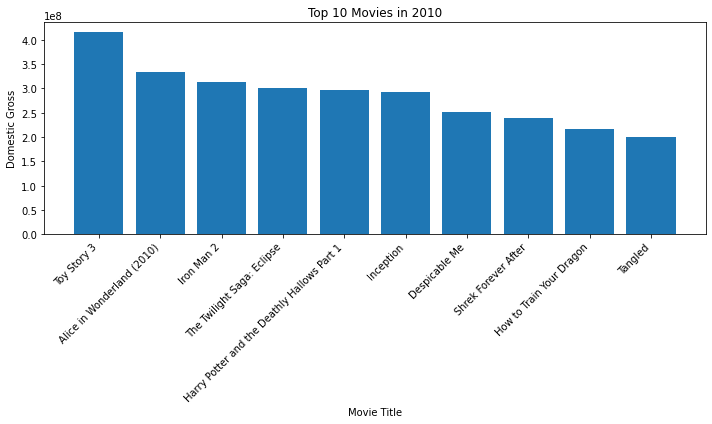

In [119]:
#Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_movies_2010['title'], top_movies_2010['domestic_gross'])
plt.xlabel('Movie Title')
plt.ylabel('Domestic Gross')
plt.title('Top 10 Movies in 2010')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Now that we know the top movies in gross revenues. We analyse further on genre. 
#Which is the most created Genre?

In [148]:
Common_Genres = pd.read_csv("C:/Users/baya/Documents/flatiron/Phase_1Project/dsc-phase-1-project/zippedData/imdb.title.basics.csv.gz", compression='gzip',header=0,)
Common_Genres

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [149]:
Common_Genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [151]:
#Drop the columns I do not need for this analysis
Common_Genres.drop(columns='tconst')
Common_Genres = Common_Genres.drop(columns='tconst')
Common_Genres

,primary_title,original_title,start_year,runtime_minutes,genres
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,6 Gunn,6 Gunn,2017,116.0,NaN


In [152]:
Common_Genres.drop(columns='primary_title')
Common_Genres = Common_Genres.drop(columns='primary_title')
Common_Genres

,original_title,start_year,runtime_minutes,genres
0,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,The Other Side of the Wind,2018,122.0,Drama
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,Dankyavar Danka,2013,NaN,Comedy
146142,6 Gunn,2017,116.0,NaN


In [153]:
Common_Genres.drop(columns='runtime_minutes')
Common_Genres1 = Common_Genres.drop(columns='runtime_minutes')
Common_Genres1

,original_title,start_year,genres
0,Sunghursh,2013,"Action,Crime,Drama"
1,Ashad Ka Ek Din,2019,"Biography,Drama"
2,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,2018,"Comedy,Drama"
4,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"
...,...,...,...
146139,Kuambil Lagi Hatiku,2019,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,Dankyavar Danka,2013,Comedy
146142,6 Gunn,2017,NaN


In [154]:
Common_Genres1.describe()

,start_year
count,146144.000000
mean,2014.621798
std,2.733583
min,2010.000000
25%,2012.000000
50%,2015.000000
75%,2017.000000
max,2115.000000


In [171]:
#Converting year column into string to be able to sort the data
Common_Genres1.loc[:, 'start_year'] = Common_Genres1['start_year'].astype(str)

#Narrowing down the data by identifying the top movies each year based on its gross
Common_Genres1.sort_values(by='start_year', ascending=False)
Common_Genres1_sorted = Common_Genres1.sort_values(by='start_year', ascending=False)
Common_Genres1_sorted

,original_title,start_year,genres
89506,100 Years,2115,Drama
96592,Avatar 5,2027,"Action,Adventure,Fantasy"
2949,Untitled Star Wars Film,2026,Fantasy
52213,Avatar 4,2025,"Action,Adventure,Fantasy"
105187,Fantastic Beasts and Where to Find Them 5,2024,"Adventure,Family,Fantasy"
...,...,...,...
74712,Civil War Life: Shot to Pieces,2010,Documentary
14471,Heinrich Kieber - Datendieb,2010,Documentary
74692,Mushrooms of America,2010,"Adventure,Comedy,Documentary"
118065,Zamana,2010,Drama


In [173]:
#Finding the most apprearing genre
#Most_Common = Common_Genres1['genres'].value_counts().index[0]
#frequency = Common_Genres1['genres'].value_counts()[0]
#Most_Common, frequency
#most_common_genres = Common_Genres1['genres'].value_counts().nlargest(10)
#most_common_genres
Common_Genre_by_year = []

for start_year in range(2010, 2019):
    Common_Genre = Common_Genres1_sorted[Common_Genres1_sorted['start_year'] == str(start_year)].head(10)
    Common_Genre_by_year.append(Common_Genre)
Common_Genre_df = pd.concat(Common_Genre_by_year)
print(Common_Genre_df)

                               original_title start_year  \
10948   Jimmy Tupper vs. the Goatman of Bowie       2010   
9508                                 Marathon       2010   
10919                         Don't Call Back       2010   
9447                                      Boy       2010   
10691                  Are You for Great Sex?       2010   
...                                       ...        ...   
132969                            Inheritance       2018   
119417                        Twisted Justice       2018   
119420             Batman: Gotham by Gaslight       2018   
120366                             Dirty Work       2018   
132971                                    Zap       2018   

                            genres  
10948                       Horror  
9508                         Drama  
10919       Comedy,Horror,Thriller  
9447                  Comedy,Drama  
10691                Drama,Romance  
...                            ...  
132969              

In [186]:
#drop rows with no values

Common_Genres1 = Common_Genre_df.dropna()
Common_Genres1

,original_title,start_year,genres
10948,Jimmy Tupper vs. the Goatman of Bowie,2010,Horror
9508,Marathon,2010,Drama
10919,Don't Call Back,2010,"Comedy,Horror,Thriller"
9447,Boy,2010,"Comedy,Drama"
10691,Are You for Great Sex?,2010,"Drama,Romance"
...,...,...,...
132969,Inheritance,2018,Drama
119417,Twisted Justice,2018,"Drama,Thriller"
119420,Batman: Gotham by Gaslight,2018,"Action,Adventure,Animation"
120366,Dirty Work,2018,Romance


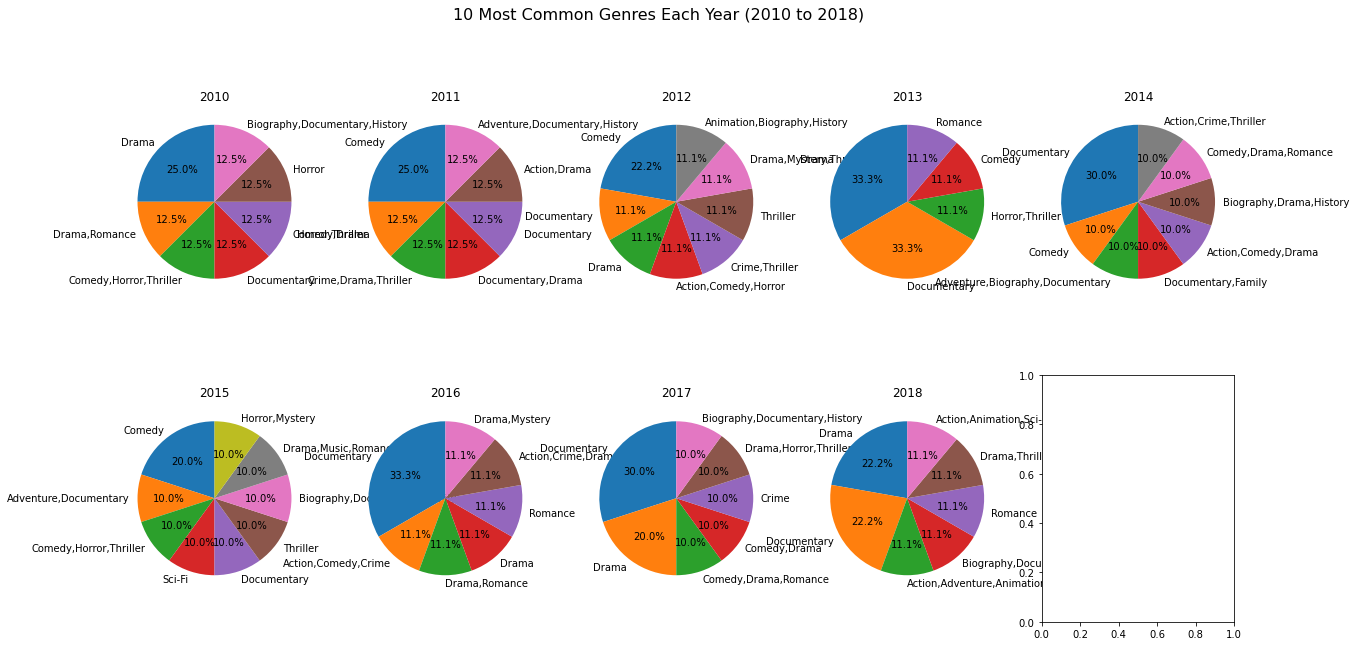

In [205]:
grouped_data = Common_Genres1.groupby('start_year')

# Create a figure to store all pie charts
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('10 Most Common Genres Each Year (2010 to 2018)', fontsize=16)

for i, (year, group) in enumerate(grouped_data):
    ax = axes[i // 5, i % 5]
    most_common_genres = group['genres'].value_counts().nlargest(10)
    ax.pie(most_common_genres, labels=most_common_genres.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(year)
    
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [207]:
#data visualization
#presenting the 10 most common genres each year in a piechart
#Common_Genre = Common_Genres1[Common_Genres1['start_year'] == '2010'].head(10)
#Common_Genre_2010

In [206]:
# Plot the pie chart
#plt.figure(figsize=(8, 8))
#plt.pie(most_common_genres, labels=most_common_genres.index, autopct='%1.1f%%')
#plt.title('Top 10 Most Common Genres 2010')
#plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart
#plt.show()

In [284]:
Profitable_Genres = pd.read_csv("C:/Users/baya/Documents/flatiron/Phase_1Project/dsc-phase-1-project/zippedData/tn.movie_budgets.csv.gz", compression='gzip',header=0,)
Profitable_Genres

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [285]:
Profitable_Genres.drop(columns='worldwide_gross')
Profitable_Genres = Profitable_Genres.drop(columns='worldwide_gross')
Profitable_Genres

#Create a column for profit
#data_type = Profitable_Genres['production_budget'].dtype
#data_type

,id,release_date,movie,production_budget,domestic_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382"
...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0


In [287]:
Profitable_Genres = Profitable_Genres.dropna()
Profitable_Genres

,id,release_date,movie,production_budget,domestic_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382"
...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0


In [280]:
# Convert 'production_budget' and 'domestic_gross' column to numeric values (integer or float)
#Profitable_Genres['production_budget'] = pd.to_numeric(Profitable_Genres['production_budget'], errors='coerce')
#Profitable_Genres['domestic_gross'] = pd.to_numeric(Profitable_Genres['domestic_gross'], errors='coerce')
# The 'errors' parameter with 'coerce' value will replace invalid parsing with NaN.

# Drop rows with NaN in 'production_budget' and 'domestic_gross' column
#Profitable_Genres.dropna(subset=['production_budget'], inplace=True)
#Profitable_Genres.dropna(subset=['domestic_gross'], inplace=True)

# Convert 'production_budget' column to integer
#Profitable_Genres['production_budget'] = Profitable_Genres['production_budget'].astype(int)
#Profitable_Genres['domestic_gross'] = Profitable_Genres['domestic_gross'].astype(int)

# Check the data types of the DataFrame
#data_types = Profitable_Genres.dtypes
#print(data_types)

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
dtype: object


In [288]:
#Creating a column using the list method

#Profitable_Genres['profitable'] = Profitable_Genres['domestic_gross'] - Profitable_Genres['production_budget']
#Profitable_Genres
#print(Profitable_Genres['profitable'])
#Profitable_Genres.shape
#Profitable_Genres
Profitable_Genres.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
dtypes: int64(1), object(4)
memory usage: 271.0+ KB


,id,release_date,movie,production_budget,domestic_gross,profitable
